In [0]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [0]:
dataset = pandas.read_csv("train.csv")
dataset.fillna(dataset.mean(axis=0), inplace= True)

In [0]:
X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]

In [57]:
dataset.values

array([[ 1.00000000e+00,  3.55030181e+00, -1.06122259e-01, ...,
         2.88463645e-02,  1.25150797e+06,  1.56438496e+06],
       [ 2.00000000e+00,  3.55030181e+00, -1.06122259e-01, ...,
        -1.02532062e-02,  1.73395035e+06,  2.16743794e+06],
       [ 3.00000000e+00,  3.55030181e+00, -6.96726938e-01, ...,
         1.57107386e-02,  1.52919738e+06,  1.91149673e+06],
       ...,
       [ 2.36650000e+04,  3.55030181e+00, -3.70551761e-01, ...,
         2.16283793e-03,  1.85596507e+06,  2.31995634e+06],
       [ 2.36660000e+04,  1.00000000e+00, -8.61852892e-01, ...,
         5.76267546e-03,  1.49049373e+06,  1.86311717e+06],
       [ 2.36670000e+04,  3.55030181e+00, -1.06122259e-01, ...,
        -5.69146325e-05,  1.50381430e+06,  1.87976788e+06]])

In [58]:
#Normalization
X.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo
0,1,3.550302,-0.106122,0.556243,0.399583,8.0,0.431565,75751,0.2254,11.0,4.736517,-0.570097,0.49,5.0,1.842984,27.053679,1.0,-0.545177,0.800674,-0.925463,2.0,0.605969,-0.489492,0.801660,-1.203166,-0.334180,0.055275
1,2,3.550302,-0.106122,0.556243,0.399583,3.0,0.388896,17369,0.0166,13.0,4.736517,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748
2,3,3.550302,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605969,0.389061,1.728096,-1.798090,-1.019370,0.003077
3,4,3.550302,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.590280,1.801865,1.0,-1.131213,1.565036,-1.204536,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.334180,0.000984
4,5,6.000000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
norm = MinMaxScaler()
norm.fit(X)
NormX = norm.transform(X)

In [61]:
Y.head()

0   -0.001152
1   -0.000180
2   -0.000284
3   -0.000076
4    0.000020
Name: Ret_59, dtype: float64

In [0]:
model = Sequential()
model.add(Dense(12, input_dim = 27, kernel_initializer = 'normal'))
model.add(Dense(8, activation = 'relu'))

In [0]:
model.add(Dense(1, activation = 'linear'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse','mae'])

In [66]:
history = model.fit(NormX, Y, epochs=50, batch_size=10)

Epoch 1/50
23667/23667 [==============================] - 2s 104us/step - loss: 1.2186e-05 - mean_squared_error: 1.2186e-05 - mean_absolute_error: 9.6758e-04
Epoch 2/50
23667/23667 [==============================] - 2s 93us/step - loss: 9.6482e-07 - mean_squared_error: 9.6482e-07 - mean_absolute_error: 6.0052e-04
Epoch 3/50
23667/23667 [==============================] - 2s 94us/step - loss: 9.9894e-07 - mean_squared_error: 9.9894e-07 - mean_absolute_error: 6.2624e-04
Epoch 4/50
23667/23667 [==============================] - 2s 94us/step - loss: 9.9564e-07 - mean_squared_error: 9.9564e-07 - mean_absolute_error: 6.2351e-04
Epoch 5/50
23667/23667 [==============================] - 2s 97us/step - loss: 1.0008e-06 - mean_squared_error: 1.0008e-06 - mean_absolute_error: 6.2509e-04
Epoch 6/50
23667/23667 [==============================] - 2s 96us/step - loss: 1.0321e-06 - mean_squared_error: 1.0321e-06 - mean_absolute_error: 6.4300e-04
Epoch 7/50
23667/23667 [==============================] -

<function matplotlib.pyplot.show>

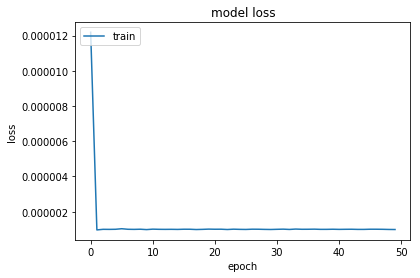

In [67]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc= 'upper left')
plt.show

In [0]:
test_data = pandas.read_csv('test_2.csv')
test_data.fillna(test_data.mean(axis = 0), inplace = True)

In [0]:
X_test = test_data.iloc[:,0:27]
Y_test = test_data.iloc[:,85]

In [0]:
norm = MinMaxScaler()
norm.fit(X_test)
NormX_test = norm.transform(X_test)

In [0]:
Y_new = model.predict(NormX)

<function matplotlib.pyplot.show>

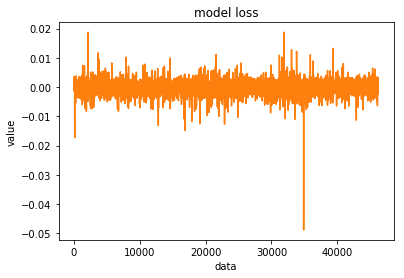

In [72]:
plt.plot(Y_new)
plt.plot(Y_test)
plt.title('model loss')
plt.xlabel('data')
plt.ylabel('value')

plt.show